#1.	Introdução:
Este roteiro de prática tem como objetivo guiar o aluno na construção de duas implementações de redes neurais para Processamento de Linguagem Natural (PLN): RNNs Simples para previsão da próxima palavra e LSTMs para classificação de sentimentos. O roteiro abrange as etapas cruciais para cada implementação, desde a preparação dos dados até o treinamento e avaliação dos modelos. O propósito é que o aluno compreenda e aplique os conceitos de redes neurais para resolver problemas de PLN de forma eficaz.


#2.	Objetivos:
•	Implementar uma Rede Neural Recorrente (RNN) simples em Python para prever a próxima palavra em uma sequência de texto, utilizando a biblioteca TensorFlow/Keras.
•	Implementar uma Rede Long Short-Term Memory (LSTM) em Python para classificar o sentimento de frases como "positivo" ou "negativo", utilizando a biblioteca TensorFlow/Keras.


#3.	Projeto a Ser Desenvolvido:
##3.1	Funcionalidades:
Os programas a serem desenvolvido:

•	Previsão da Próxima Palavra: Implementar uma RNN simples para prever a próxima palavra em uma sequência de texto.

•	Classificação de Sentimentos: Implementar uma LSTM para classificar o sentimento de frases como "positivo" ou "negativo".
##3.2	Etapas de Desenvolvimento (Fluxo do Programa):
###3.2.1	Implementação 1: RNNs Simples para Previsão da Próxima Palavra
•	Etapa 1: Preparação dos dados: Coletar e pré-processar um corpus de texto para treinamento.

•	Etapa 2: Construção do modelo RNN:  Definir a arquitetura da RNN simples.

•	Etapa 3: Treinamento do modelo: Treinar a RNN usando o corpus preparado.

•	Etapa 4: Avaliação do modelo: Avaliar o desempenho da RNN na previsão da próxima palavra.

•	Etapa 5: Teste do modelo: Testar o modelo com novas frases.
###3.2.2	Implementação 2: LSTMs para Classificação de Sentimentos
•	Etapa 1: Preparação dos dados: Coletar e pré-processar um conjunto de dados de frases rotuladas (positivo/negativo).

•	Etapa 2: Construção do modelo LSTM: Definir a arquitetura da LSTM.

•	Etapa 3: Treinamento do modelo: Treinar a LSTM usando os dados rotulados.

•	Etapa 4: Avaliação do modelo: Avaliar o desempenho da LSTM na classificação de sentimentos.

•	Etapa 5: Teste do modelo: Testar o modelo com novas frases.


#4.	Procedimentos Detalhados:

##4.1	Implementação 1: Modelo de Rede Neural de Recorrência

### Passo 1: Configuração do Ambiente no Google Colab

In [1]:
# Importar bibliotecas necessárias
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


###Explicação

*   numpy: Para operações numéricas
*   tensorflow.keras: A API de alto nível para construir e treinar modelos de deep learning
*   Embedding: Camada que transforma palavras (índices numéricos) em vetores densos.
*   SimpleRNN: A camada de Rede Neural Recorrente mais básica.
*   Dense: Camada neural comum (fully connected layer).
*   Tokenizer: Para converter texto em sequências de números.
*   pad_sequences: Para garantir que todas as sequências de entrada tenham o mesmo comprimento.

###Passo 2: Preparação do Conjunto de Dados

In [2]:
# 1. Definir o conjunto de treinamento de dados (frases e rótulos)
textos_treinamento = [
    "eu gosto de programar em python",
    "python é uma linguagem poderosa",
    "programação divertida em python",
    "aprenda python e seja feliz",
    "gosto de aprender coisas novas"
]
print(f"Textos de treinamento: {textos_treinamento}")

# 2. Inicializar o tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(textos_treinamento)

# 3. Converter textos para sequências de números
sequencias = tokenizer.texts_to_sequences(textos_treinamento)
print(f"Vocabulário (palavra: índice): {tokenizer.word_index}")
print(f"Sequências numéricas dos textos: {sequencias}")

# 4. Calcular o tamanho do vocabulário (+1 para incluir o 0 de padding)
total_palavras = len(tokenizer.word_index) + 1
print(f"Tamanho total do vocabulário: {total_palavras}")

# 5. Preparar Entradas (X) e Saídas (Y) para a previsão da próxima palavra
# A entrada (X) será uma sequência de palavras, e a saída (Y) será a palavra seguinte.
max_comprimento = max(len(seq) for seq in sequencias)
print(f"Comprimento máximo das sequências antes do padding: {max_comprimento}")

entradas_X = []
saidas_Y = []

for seq in sequencias:
    for i in range(1, len(seq)):
        entradas_X.append(seq[:i]) # A sequência até a palavra atual
        saidas_Y.append(seq[i])   # A próxima palavra

print(f"Exemplo de entradas X (parcial): {entradas_X[:5]}")
print(f"Exemplo de saídas Y (parcial): {saidas_Y[:5]}")

# 6. Padronizar o comprimento das sequências de entrada
# Todas as sequências de entrada precisam ter o mesmo comprimento para a RNN.
# Usamos max_len-1 porque a saída, que é a última palavra, pad_sequences sempre terá 1 palavra a menos.
entradas_X_padded = pad_sequences(entradas_X, maxlen=max_comprimento - 1, padding='pre')
print(f"Formato final das entradas (X): {entradas_X_padded.shape}")

# 7. Converter as saídas para o formato one-hot encoding
# Isso é necessário para a camada de saída do RNN (softmax)
saidas_Y_one_hot = tf.keras.utils.to_categorical(saidas_Y, num_classes=total_palavras)
print(f"Formato final das saídas (Y): {saidas_Y_one_hot.shape}")

Textos de treinamento: ['eu gosto de programar em python', 'python é uma linguagem poderosa', 'programação divertida em python', 'aprenda python e seja feliz', 'gosto de aprender coisas novas']
Vocabulário (palavra: índice): {'python': 1, 'gosto': 2, 'de': 3, 'em': 4, 'eu': 5, 'programar': 6, 'é': 7, 'uma': 8, 'linguagem': 9, 'poderosa': 10, 'programação': 11, 'divertida': 12, 'aprenda': 13, 'e': 14, 'seja': 15, 'feliz': 16, 'aprender': 17, 'coisas': 18, 'novas': 19}
Sequências numéricas dos textos: [[5, 2, 3, 6, 4, 1], [1, 7, 8, 9, 10], [11, 12, 4, 1], [13, 1, 14, 15, 16], [2, 3, 17, 18, 19]]
Tamanho total do vocabulário: 20
Comprimento máximo das sequências antes do padding: 6
Exemplo de entradas X (parcial): [[5], [5, 2], [5, 2, 3], [5, 2, 3, 6], [5, 2, 3, 6, 4]]
Exemplo de saídas Y (parcial): [2, 3, 6, 4, 1]
Formato final das entradas (X): (20, 5)
Formato final das saídas (Y): (20, 20)


###Explicação:
*   Geracão de Pares (Sequência --> Próxima Palavra) para treinar a RNN a prever a próxima palavra, transformamos cada frase em múltiplos pares de (sequência parcial, próxima palavra).
*   pad_sequences: É vital. Como as sequências parciais têm comprimentos variados, pad_sequences preenche (com zeros, por padrão) as sequências mais curtas para que todas tenham o mesmo maxlen. O 'padding='pre' significa que os zeros são adicionados no início.
*   to_categorical: A camada de saída da RNN (com softmax) produz uma probablidade para cada palavra no vocabulário. to_categorical converte o índice da palavra real em um vetor, onde apenas a posição da palavra correta é 1 e o resto é 0, chamado de "one-hot encoding".

### Passo 3: Construção do Modelo RNN

In [3]:
# 1. Definindo o modelo
modelo_rnn = Sequential()

# 2. Camada de Embedding:
# total_palavras: tamanho do vocabulário
# 10: dimensão do vetor de embedding (quantas características queremos para cada palavra)
# input_length: comprimento padronizado das sequências de entrada (maxlen - 1)
modelo_rnn.add(Embedding(total_palavras, 10, input_length=entradas_X_padded.shape[1]))

# 3. Camada SimpleRNN:
# 32: número de unidades (neurônios) na camada recorrente. Este é o tamanho do estado oculto.
modelo_rnn.add(SimpleRNN(32))

# 4. Camada Densa de Saída:
# total_palavras: número de neurônios de saída (um para cada palavra no vocabulário)
# activation='softmax': função de ativação para probabilidade (soma 1 para todas as palavras)
modelo_rnn.add(Dense(total_palavras, activation='softmax'))

# 5. Compilar o modelo
modelo_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Exibir um resumo da arquitetura do modelo
modelo_rnn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

###Explicação da Arquitetura:

* Embedding Layer: Essencial em PLN. Ela mapeia cada palavra (representada por seu índice numérico) para um vetor denso de embedding. Este vetor captura relações semânticas entre as palavras. Por exemplo, palavras com significados semelhantes estarão "próximas" no espaço de embedding.
* SimpleRNN Layer: Esta é a camada recorrente. Ela recebe as sequências de embeddings e processa-as passo a passo. O 32 indica a dimensão do vetor de estado oculto (ou seja, a 'memória' que a RNN carrega ao longo do tempo).
* Dense (Output) Layer: Esta camada final recebe o estado oculto final da SimpleRNN e o transforma em um vetor de probabilidades, onde cada posição corresponde a uma palavra do vocabulário. A função softmax garante que a soma dessas probabilidades seja 1.

### Passo 4: Treinamento do Modelo

In [4]:
# 1. Treinando o modelo
print("\nIniciando o treinamento do modelo RNN...")
modelo_rnn.fit(entradas_X_padded, saidas_Y_one_hot, epochs=100, verbose=1)
# epochs: quantas vezes o modelo verá todo o conjunto de dados
# verbose: 1 para mostrar o progresso do treinamento
print("Treinamento concluído!")


Iniciando o treinamento do modelo RNN...
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 2.9917
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.0000e+00 - loss: 2.9838
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0000e+00 - loss: 2.9759
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1000 - loss: 2.9680
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1000 - loss: 2.9599
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1500 - loss: 2.9518
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2000 - loss: 2.9434
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2000 - loss: 2.9349
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2000 - loss: 2.9262
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2500 - loss: 2.9173
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.2500 - loss: 2.9080
Epoch 12/100
1/1 ━━━━━

### Passo 5: Usar o Modelo para Previsão

In [5]:
def prever_proxima_palavra(modelo, tokenizer, max_seq_len, texto_base):
    """
    Prevê a próxima palavra dado um texto base.
    """
    # Converter o texto base para sequência numérica
    sequencia_numerica = tokenizer.texts_to_sequences([texto_base])[0]

    # Padronizar o comprimento da sequência de entrada (precisa ter o mesmo formato que o treinamento)
    # Atenção: max_seq_len deve ser o comprimento que as "entradas" foram pad_sequences
    sequencia_padded = pad_sequences([sequencia_numerica], maxlen=max_seq_len, padding='pre')

    # Fazer a previsão
    previsao_probabilidades = modelo.predict(sequencia_padded, verbose=0)[0]

    # Obter o índice da palavra com a maior probabilidade
    indice_palavra_prevista = np.argmax(previsao_probabilidades)

    # Converter o índice de volta para a palavra
    for palavra, indice in tokenizer.word_index.items():
        if indice == indice_palavra_prevista:
            return palavra
    return None # Caso a palavra não seja encontrada (improvável com o vocabulário ajustado)

# Comprimento de entrada esperado pelo modelo
# entradas_X_padded.shape[1] É o maxlen que usamos no pad_sequences para X
comprimento_entrada_modelo = entradas_X_padded.shape[1]

# Testar o modelo com novas frases
print("\n--- Testando o Modelo RNN ---")

texto_teste_1 = "eu gosto de"
proxima_1 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_1)
print(f"Texto: '{texto_teste_1}' -> Próxima palavra prevista: '{proxima_1}'")

texto_teste_2 = "python é uma"
proxima_2 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_2)
print(f"Texto: '{texto_teste_2}' -> Próxima palavra prevista: '{proxima_2}'")

texto_teste_3 = "programar é divertido"
proxima_3 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_3)
print(f"Texto: '{texto_teste_3}' -> Próxima palavra prevista: '{proxima_3}'")

texto_teste_4 = "aprenda python e"
proxima_4 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_4)
print(f"Texto: '{texto_teste_4}' -> Próxima palavra prevista: '{proxima_4}'")

# Exemplo com palavra fora do vocabulário (ou sequência que o modelo nunca viu antes)
texto_teste_5 = "o sol brilha no" # Palavras "sol" e "brilha" não estão no vocabulário
proxima_5 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_5)
print(f"Texto: '{texto_teste_5}' -> Próxima palavra prevista: '{proxima_5}' (Pode ser inesperada devido a palavras desconhecidas)")


--- Testando o Modelo RNN ---
Texto: 'eu gosto de' -> Próxima palavra prevista: 'programar'
Texto: 'python é uma' -> Próxima palavra prevista: 'linguagem'
Texto: 'programar é divertido' -> Próxima palavra prevista: 'python'
Texto: 'aprenda python e' -> Próxima palavra prevista: 'seja'
Texto: 'o sol brilha no' -> Próxima palavra prevista: 'python' (Pode ser inesperada devido a palavras desconhecidas)


## Implementação 2: Modelo de Rede Neural Rede Long Short-Term Memory

### Implementação 2: Modelo de Rede Neural Rede Long Short-Term Memory

In [6]:
# Importar bibliotecas necessárias
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!



###O que tem de novo aqui?
* LSTM: A camada de Rede Long Short-Term Memory.
* train_test_split (sklearn): Para dividir o dataset em conjuntos de treinamento e teste.
* classification_report, confusion_matrix (sklearn): Para avaliar o desempenho do modelo.
* matplotlib.pyplot, seaborn: Para visualização dos resultados.

### Passo 2: Preparação do Conjunto de Dados (Frases e Rótulos) para análise de sentimentos

In [7]:
# 1. Definir o conjunto de dados (frases e rótulos)
dados_sentimento = [
    ("Eu gostei muito do filme, divertido", "positivo"),
    ("Que adorei o livro, muito bom", "positivo"),
    ("Gostei muito da atuação dos atores", "positivo"),
    ("O roteiro é fraco e chato", "negativo"),
    ("Não recomendo este último produto", "negativo"),
    ("Uma perda de tempo horrível", "negativo"),
    ("Ótimo trabalho, parabéns", "positivo"),
    ("Terrível experiência, nunca mais", "negativo"),
    ("Excelente serviço, muito eficiente", "positivo"),
    ("Que decepção, muito ruim", "negativo"),
    ("Aprendizado de máquina é fascinante", "positivo"),
    ("Filme foi cansativo, sem graça", "negativo"),
    ("Este software travou várias vezes", "negativo"),
    ("A interface é confusa e difícil", "negativo"),
    ("O aplicativo é super útil e rápido", "positivo"),
]

textos = [dado[0] for dado in dados_sentimento]
sentimentos = [dado[1] for dado in dados_sentimento]

print(f"Total de frases: {len(textos)}")
print(f"Exemplo de textos: {textos[:3]}")
print(f"Exemplo de sentimentos: {sentimentos[:3]}")

# 2. Mapear Sentimentos para Números: converter "positivo" e "negativo" para 0 e 1.
mapeamento_sentimento = {'negativo': 0, 'positivo': 1}
rotulos_numericos = np.array([mapeamento_sentimento[s] for s in sentimentos])
print(f"\nSentimentos mapeados para números: {rotulos_numericos}")

# 3. Tokenização de Texto
tokenizer = Tokenizer(num_words=None, oov_token="<unk>") # oov_token para palavras desconhecidas
tokenizer.fit_on_texts(textos)
sequencias_numericas = tokenizer.texts_to_sequences(textos)

# +1 para o 0 de padding/OOV (out of vocabulary)
total_palavras_vocab = len(tokenizer.word_index) + 1
print(f"\nVocabulário (palavra: índice): {tokenizer.word_index}")
print(f"Sequências numéricas das frases: {sequencias_numericas}")
print(f"Tamanho total do vocabulário: {total_palavras_vocab}")

# 4. Padronizar o comprimento das sequências
# Encontrar o comprimento da frase mais longa para padronizar
max_len = max(len(s) for s in sequencias_numericas)
print(f"\nComprimento máximo das sequências: {max_len}")

# 'post' para adicionar zeros no final
sequencias_padded = pad_sequences(sequencias_numericas, maxlen=max_len, padding='post')
print(f"Sequências após padding: {sequencias_padded}")

# 5. Dividir os dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
    sequencias_padded, rotulos_numericos, test_size=0.2, random_state=42, stratify=rotulos_numericos
)

print(f"\nShape de X_treino: {X_treino.shape}")
print(f"Shape de X_teste: {X_teste.shape}")
print(f"Shape de y_treino: {y_treino.shape}")
print(f"Shape de y_teste: {y_teste.shape}")

Total de frases: 15
Exemplo de textos: ['Eu gostei muito do filme, divertido', 'Que adorei o livro, muito bom', 'Gostei muito da atuação dos atores']
Exemplo de sentimentos: ['positivo', 'positivo', 'positivo']

Sentimentos mapeados para números: [1 1 1 0 0 0 1 0 1 0 1 0 0 0 1]

Vocabulário (palavra: índice): {'<unk>': 1, 'muito': 2, 'é': 3, 'o': 4, 'e': 5, 'gostei': 6, 'filme': 7, 'que': 8, 'este': 9, 'de': 10, 'eu': 11, 'do': 12, 'divertido': 13, 'adorei': 14, 'livro': 15, 'bom': 16, 'da': 17, 'atuação': 18, 'dos': 19, 'atores': 20, 'roteiro': 21, 'fraco': 22, 'chato': 23, 'não': 24, 'recomendo': 25, 'último': 26, 'produto': 27, 'uma': 28, 'perda': 29, 'tempo': 30, 'horrível': 31, 'ótimo': 32, 'trabalho': 33, 'parabéns': 34, 'terrível': 35, 'experiência': 36, 'nunca': 37, 'mais': 38, 'excelente': 39, 'serviço': 40, 'eficiente': 41, 'decepção': 42, 'ruim': 43, 'aprendizado': 44, 'máquina': 45, 'fascinante': 46, 'foi': 47, 'cansativo': 48, 'sem': 49, 'graça': 50, 'software': 51, 'travo

### Passo 3: Construção do Modelo LSTM

In [8]:
# 1. Definir a arquitetura do modelo LSTM
modelo_lstm = Sequential()

# 2. Camada de Embedding: Converte os índices numéricos das palavras em vetores densos.
# total_palavras_vocab: tamanho do vocabulário
# 50: dimensão do vetor de embedding (pode ser ajustado)
# input_length: comprimento padronizado das sequências (max_len)
modelo_lstm.add(Embedding(total_palavras_vocab, 50, input_length=max_len))

# 3. Camada LSTM:
# 64: número de unidades (neurônios) na camada LSTM. Define o tamanho do estado oculto e da célula de memória.
# dropout: Um tipo de regularização para evitar overfitting (descarta aleatoriamente neurônios durante o treinamento).
# recurrent_dropout: Dropout aplicado nas conexões recorrentes da LSTM.
modelo_lstm.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))

# 4. Camada Densa de Saída:
# 1: Um único neurônio de saída, pois é um problema de classificação binária (positivo/negativo).
# activation='sigmoid': Função de ativação para classificação binária (produz um valor entre 0 e 1).
modelo_lstm.add(Dense(1, activation='sigmoid'))

# 5. Compilar o modelo
modelo_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 6. Exibir um resumo da arquitetura do modelo
modelo_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Passo 4: Treinamento e Avaliação do Modelo


Iniciando o treinamento do modelo LSTM...
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 289ms/step - accuracy: 0.4389 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6778 - loss: 0.6903 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7931 - loss: 0.6906 - val_accuracy: 0.5000 - val_loss: 0.6954
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9181 - loss: 0.6834 - val_accuracy: 0.5000 - val_loss: 0.6965
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9458 - loss: 0.6742 - val_accuracy: 0.5000 - val_loss: 0.6974
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8764 - loss: 0.6662 - val_accuracy: 0.5000 - val_loss: 0.6988
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9667 - loss: 0.6438 - val_accuracy: 0.5000 - val_loss: 0.6996
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8764 - loss: 0.607

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


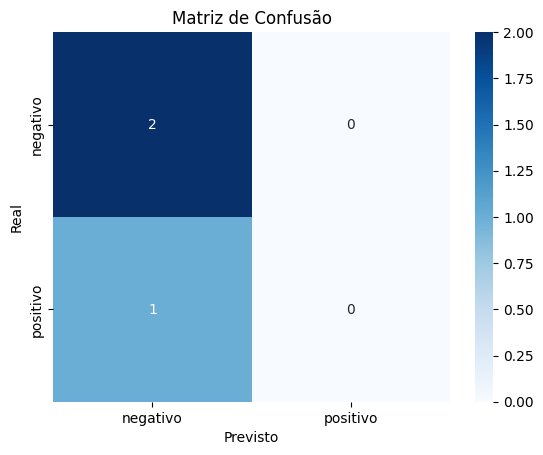

In [9]:
# 1. Treinar o modelo
print("\nIniciando o treinamento do modelo LSTM...")
historico = modelo_lstm.fit(
    X_treino, y_treino,
    epochs=50, # Reduzi para 50 epochs para um treinamento mais rápido no exemplo. Pode ser aumentado.
    batch_size=2, # Pequeno batch_size para dataset pequeno.
    validation_split=0.1, # Usar 10% do treino para validação
    verbose=1
)
# epochs: número de vezes que o modelo verá todo o conjunto de treinamento.
# batch_size: número de amostras por atualização de gradiente.
# validation_split: % dos dados de treino usados para validação durante o treinamento (opcional, mas bom para monitorar overfitting).
print("Treinamento concluído!")

# 2. Avaliar o modelo no conjunto de teste
perda, acuracia = modelo_lstm.evaluate(X_teste, y_teste, verbose=0)
print(f"Acurácia do modelo no conjunto de teste: {acuracia*100:.2f}%")
print(f"Perda do modelo no conjunto de teste: {perda:.4f}")

# 3. Fazer previsões no conjunto de teste
y_pred_prob = modelo_lstm.predict(X_teste)
y_pred_classes = (y_pred_prob > 0.5).astype(int) # Converter probabilidades para 0 ou 1

print("\n--- Relatório de Classificação ---")
print(classification_report(y_teste, y_pred_classes, target_names=['negativo', 'positivo']))

print("\n--- Matriz de Confusão ---")
cm = confusion_matrix(y_teste, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negativo', 'positivo'], yticklabels=['negativo', 'positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

### Passo 5: Testar o Modelo com Novas Frases

In [10]:
def prever_sentimento(modelo, tokenizer, max_seq_len, frase_nova, mapeamento_sentimento):
    """
    Prevê o sentimento de uma nova frase.
    """
    # Converter a frase para sequência numérica
    sequencia_numerica = tokenizer.texts_to_sequences([frase_nova])[0]

    # Se a frase tem palavras desconhecidas, o tokenizer pode retornar uma lista vazia ou valores 0
    if not sequencia_numerica:
        print(f"Aviso: A frase '{frase_nova}' contém palavras desconhecidas.")
        return "Desconhecido ou Outra indicação" # ou retornar um valor padrão, ou levantar um erro

    # Padronizar o comprimento da sequência de entrada
    sequencia_padded = pad_sequences([sequencia_numerica], maxlen=max_seq_len, padding='post')

    # Fazer a previsão (probabilidade)
    probabilidade_positiva = modelo.predict(sequencia_padded, verbose=0)[0][0]

    # Inverter o mapeamento para obter o nome do sentimento
    mapeamento_inverso = {v: k for k, v in mapeamento_sentimento.items()}

    # Classificar com base no limiar de 0.5
    if probabilidade_positiva > 0.5:
        return mapeamento_inverso[1] # 'positivo'
    else:
        return mapeamento_inverso[0] # 'negativo'

# Testar o modelo com novas frases
print("\n--- Testando o Modelo LSTM com Novas Frases ---")

frase_nova_1 = "gostei muito do filme, excelente!"
sentimento_1 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_1, mapeamento_sentimento)
print(f"Frase: '{frase_nova_1}' -> Sentimento previsto: '{sentimento_1}'")

frase_nova_2 = "odiei o livro, muito entediante"
sentimento_2 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_2, mapeamento_sentimento)
print(f"Frase: '{frase_nova_2}' -> Sentimento previsto: '{sentimento_2}'")

frase_nova_3 = "a aula de pln é ótima"
sentimento_3 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_3, mapeamento_sentimento)
print(f"Frase: '{frase_nova_3}' -> Sentimento previsto: '{sentimento_3}'")

frase_nova_4 = "o atendimento foi péssimo"
sentimento_4 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_4, mapeamento_sentimento)
print(f"Frase: '{frase_nova_4}' -> Sentimento previsto: '{sentimento_4}'")

frase_nova_5 = "esse produto não vale a pena, é caro"
sentimento_5 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_5, mapeamento_sentimento)
print(f"Frase: '{frase_nova_5}' -> Sentimento previsto: '{sentimento_5}'")

frase_nova_6 = "o filme é legal" # Frase curta e ambígua para um modelo pequeno
sentimento_6 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_6, mapeamento_sentimento)
print(f"Frase: '{frase_nova_6}' -> Sentimento previsto: '{sentimento_6}'")

frase_nova_7 = "isso é horrível, que tristeza"
sentimento_7 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_7, mapeamento_sentimento)
print(f"Frase: '{frase_nova_7}' -> Sentimento previsto: '{sentimento_7}'")


--- Testando o Modelo LSTM com Novas Frases ---
Frase: 'gostei muito do filme, excelente!' -> Sentimento previsto: 'positivo'
Frase: 'odiei o livro, muito entediante' -> Sentimento previsto: 'positivo'
Frase: 'a aula de pln é ótima' -> Sentimento previsto: 'negativo'
Frase: 'o atendimento foi péssimo' -> Sentimento previsto: 'negativo'
Frase: 'esse produto não vale a pena, é caro' -> Sentimento previsto: 'negativo'
Frase: 'o filme é legal' -> Sentimento previsto: 'negativo'
Frase: 'isso é horrível, que tristeza' -> Sentimento previsto: 'negativo'
